<h1 style="text-align:center;">Sprint 4: Tarea 1 - Visualización Exploratoria</h1>

In [109]:
#importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

**EJERCICIO 1**: Descarga el dataset adjunto precio alquiler por trimestre y barri.csv  extraído de la web OpenDataBCN y resume estadísticamente y gráficamente.

Crea al menos una visualización para:

* Una variable categórica (Distrito o Barrio)
* Una variable numérica (Precio)
* Una variable numérica y una categórica (Distrito y Precio)
* Dos variables numéricas (Año o Trimestre y Precio)
* Tres variables (Barrio o Distrito, Trimestre y Precio)

In [110]:
data = pd.read_csv('preu_lloguer_per_trimestre_i_barri.csv')

In [111]:
#exploramos los datos
data.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [113]:
#convertimos la columna Preu de object a numeric
data['Preu'] = pd.to_numeric(data['Preu'], errors='coerce')

In [119]:
#creamos la columna Total_Barri con el total de barrios por distrito
data['Total_Barri'] = data.groupby('Nom_Districte')['Nom_Barri'].transform('count')


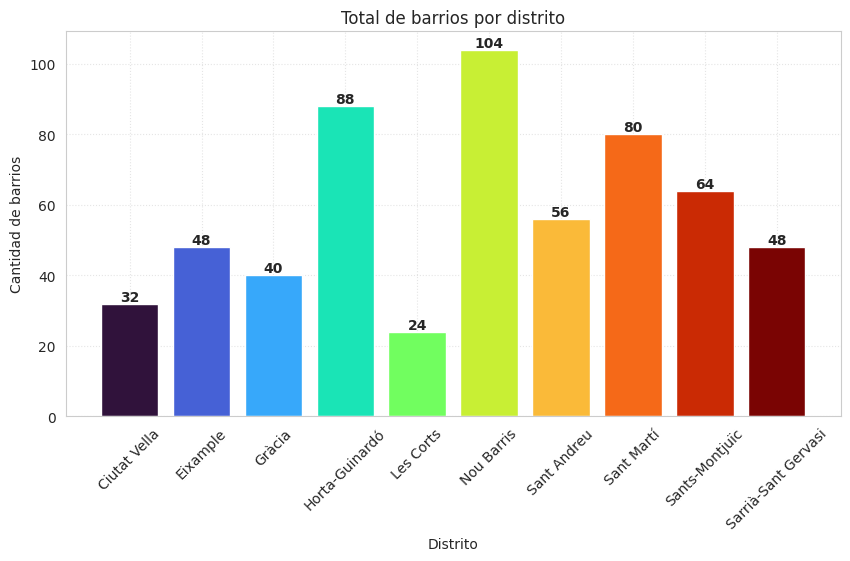

In [122]:
# Agrupamos por 'Nom_Districte' y tomamos un valor único de 'Total_Barri' para cada grupo
grouped_data = data.groupby('Nom_Districte')['Total_Barri'].first()

# Extraemos las etiquetas y los valores para el gráfico de barras
labels = grouped_data.index
values = grouped_data.values

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Definimos los colores
colors = plt.cm.turbo(np.linspace(0, 1, len(labels)))

# Graficamos
ax.bar(labels, values, color=colors)
ax.set_xlabel('Distrito')
ax.set_ylabel('Cantidad de barrios')
ax.set_title('Total de barrios por distrito')
plt.xticks(rotation=45)

ax.grid(True, linestyle=':', alpha=0.5)
#mostramos los valores 'values' en cada barra
for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

#guardamos la imagen
plt.savefig('total_barrios_por_distrito.png', bbox_inches='tight', dpi=300)
plt.show()


**Descripción**: La figura muestra la cantidad de barrios que existe en cada distrito, se ha usado las variables categoricas Nom_Barri y Nom_Districte para crear la visualización.
Del grafico de barra podemos observar que el distrito con mayor cantidad de barrios es el Nou Barris, con 104 barrios, por el contrario Les corts, con solo 24 barrios es el que menos barrios tiene.

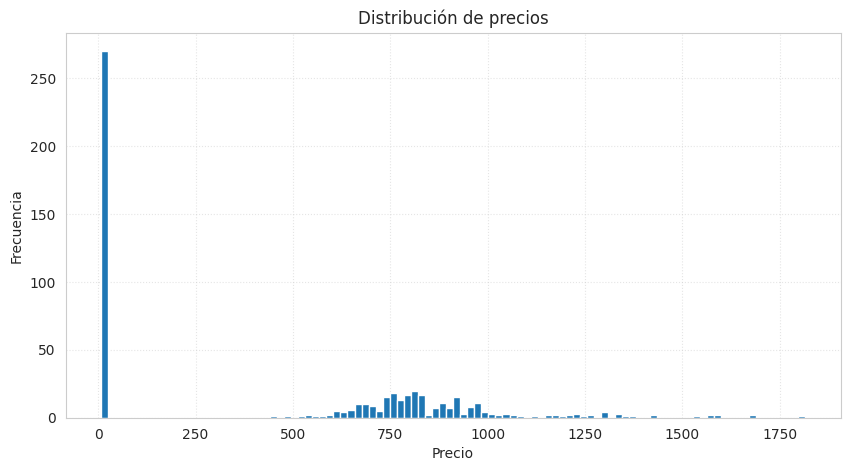

In [123]:
#Creamos un histograma para ver la distribucion de los precios vs frecuencia con ax 
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(data['Preu'], bins=100)
ax.set_xlabel('Precio')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de precios')
ax.grid(True, linestyle=':', alpha=0.5)
#guardamos la imagen
plt.savefig('histograma_antes_de_la_limpieza.png', dpi=300, bbox_inches='tight')
plt.show()

**Descripción**: Al analizar a simple vista el histograma que representa el Precio vs la frecuencia, podemos observar valores atipicos a la distribución de los datos, por lo que indagué mas en las otras columnas para buscar una explicación a estos valores atipicos. En la columna `LLoguer_mitja` se puede apreciar que la descripción de estos valores corresponden a unidades de 'Euros/m2 mes', mientras que los otros valores corresponden a 'Euros/mes'. Por lo que se puede concluir que los valores atipicos corresponden a los precios por m2. En consecuencia *eliminaré* estos valores atipicos para poder analizar mejor la distribución de los datos.

In [124]:
#excluimos los datos cuya condicion es que en la columna Loguer_mitja es igual a Lloguer mitjà per superfície (Euros/m2 mes)
data = data[data['Lloguer_mitja'] != 'Lloguer mitjà per superfície (Euros/m2 mes)']

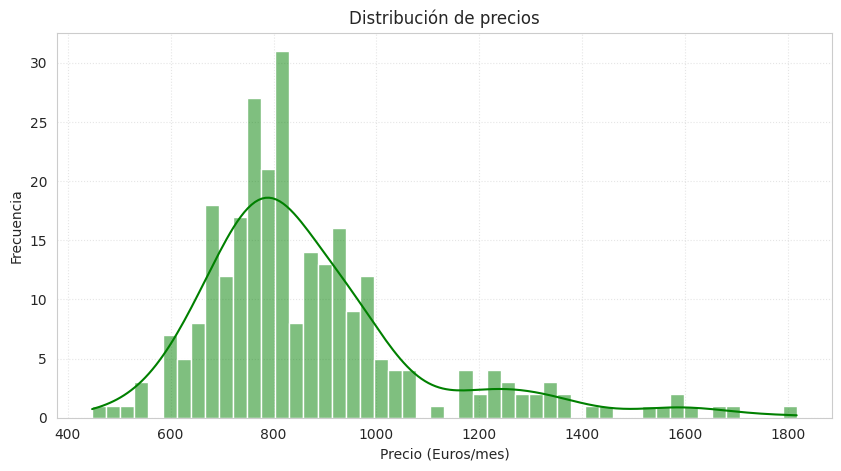

In [137]:
#procedemos nuevamente a hacer un histograma para ver la distribucion de los precios vs frecuencia
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data['Preu'], bins=50, kde=True, color='green')
ax.set_xlabel('Precio (Euros/mes)')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de precios')
ax.grid(True, linestyle=':', alpha=0.5)
#guardamos la imagen
plt.savefig('histograma_despues_de_la_limpieza.png', dpi=300, bbox_inches='tight')
plt.show()

**Descripción**: El nuevo histograma de Precios vs Frecuencia muestra que los datos siguen una distribucion normal con sesgo hacia la derecha (positivo), esto sugiere que la media es mayor que la mediana.  

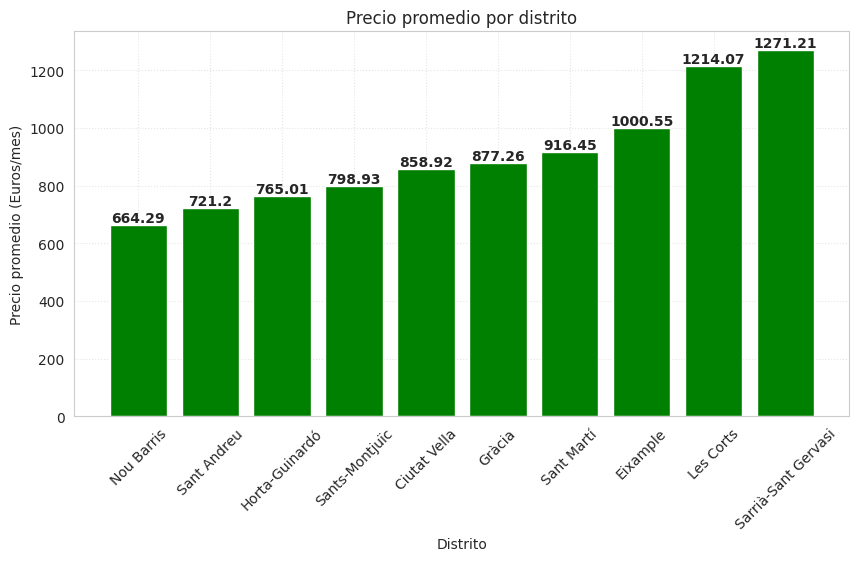

In [136]:
#Para visualizar una variable numerica y una categorica, mostraremos los precios promedio por distrito
#creamos un nuevo dataframe con los datos de interes
data2 = data[['Nom_Districte', 'Preu']]
#agrupamos por distrito y calculamos el precio promedio
data2 = data2.groupby('Nom_Districte').mean()
#ordenamos de menor a mayor
data2 = data2.sort_values(by='Preu')

#creamos el grafico
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(data2.index, data2['Preu'], color='green')
ax.set_xlabel('Distrito')
ax.set_ylabel('Precio promedio (Euros/mes)')
ax.set_title('Precio promedio por distrito')
plt.xticks(rotation=45)
ax.grid(True, linestyle=':', alpha=0.5)

#mostramos los valores 'values' en cada barra
for i, v in enumerate(data2['Preu']):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

#guardamos la imagen
plt.savefig('precio_promedio_distrito.png', dpi=300, bbox_inches='tight')

plt.show()

**Descripción**: El grafico de barras muestra el precio promedio por distrito, se puede observar que el distrito con mayor precio promedio es `Sarria-Sant Gervasi`, mientras que el distrito con menor precio promedio es `Nou Barris` en (2021). 

In [81]:
#Generaremos un grafico de lineas para mostrar  las tendencias de precios promedio durante los trimestres. Para ellor usaremos dos variables numéricas.
#creamos un nuevo dataframe con los datos de interes
data3 = data[['Trimestre', 'Preu']]
#agrupamos por trimestre y calculamos el precio promedio
data3 = data3.groupby('Trimestre').mean()
#categorizamos los trimestres
data3.index = ['T1', 'T2', 'T3', 'T4']


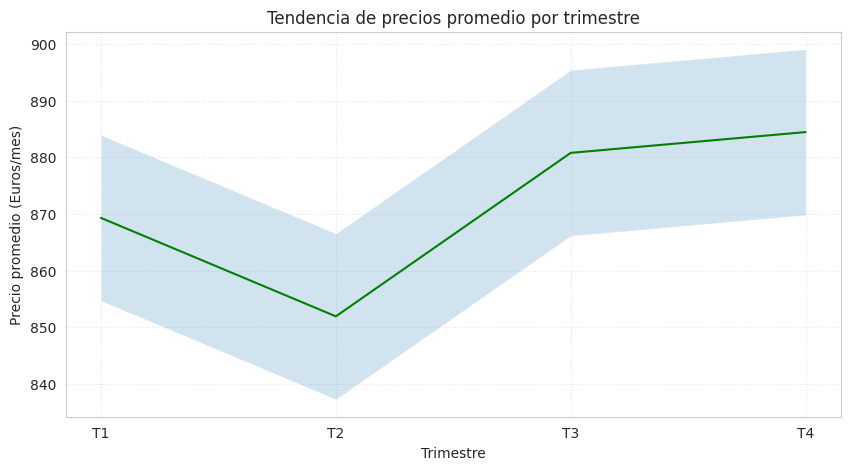

In [135]:
#hacemos el grafico de tendencias de precios promedio por trimestre
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data3.index, data3['Preu'], color='green')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Precio promedio (Euros/mes)')
ax.set_title('Tendencia de precios promedio por trimestre')
ax.grid(True, linestyle=':', alpha=0.5)
#mostramos los errores estandar para cada trimestre
ax.fill_between(data3.index, data3['Preu'] - data3['Preu'].std(), data3['Preu'] + data3['Preu'].std(), alpha=0.2)

#guardamos el grafico
plt.savefig('tendencia_precios_promedio.png', dpi=300, bbox_inches='tight')

plt.show()

**Descripción**: El grafico muestra la tendencia de precios promedio por trimestre, se observa que durante el 2021, el precio promedio cayo en el segundo trimestre, pero se recupero en el tercer trimestre y continuo a la alza en el cuarto trimestre.

In [83]:
#Vamos ahora generar gráfico de barras agrupado que muestra las tendencias de precios de cada distrito durante trimestres.
#creamos un nuevo dataframe con los datos de interes
data4 = data[['Nom_Districte', 'Trimestre', 'Preu']]
#agrupamos por distrito y trimestre y calculamos el precio promedio
data4 = data4.groupby(['Nom_Districte', 'Trimestre']).mean()
#reseteamos el indice
data4 = data4.reset_index()

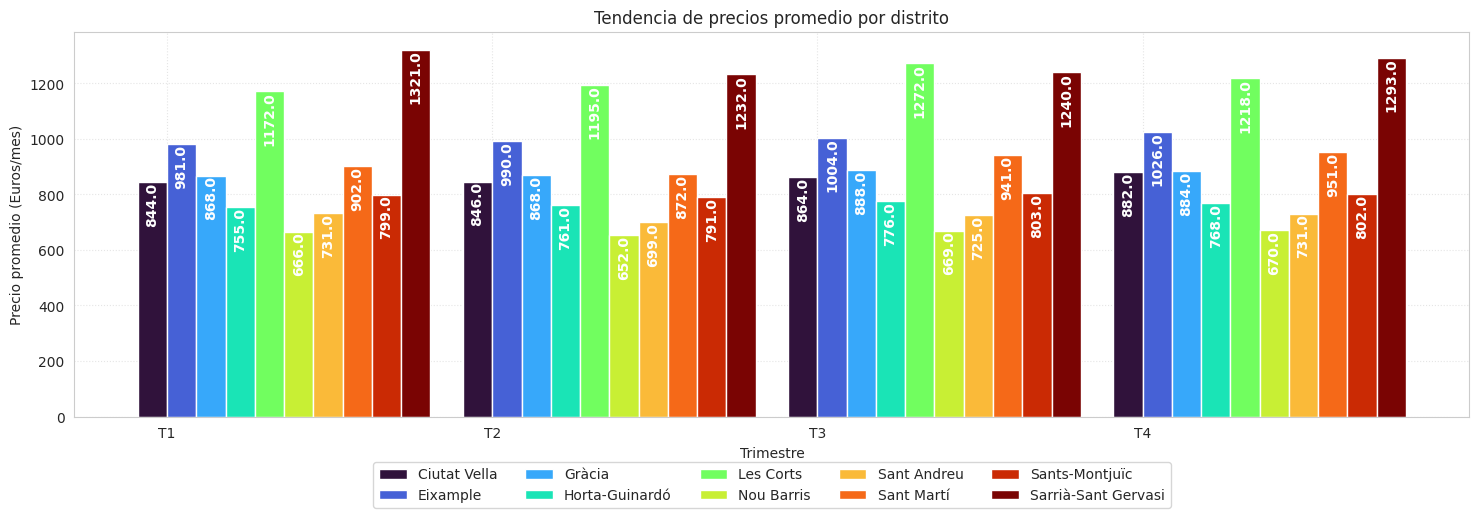

In [134]:
#creamos el grafico
fig, ax = plt.subplots(figsize=(18, 5))
#definimos el ancho de las barras
width = 0.09
#definimos los trimestres
trimestres = ['T1', 'T2', 'T3', 'T4']
#definimos los colores
colors = plt.cm.turbo(np.linspace(0, 1, len(data4['Nom_Districte'].unique())))
#definimos el indice para el eje x
x = np.arange(len(trimestres))

#creamos el grafico de barras agrupado
for i, distrito in enumerate(data4['Nom_Districte'].unique()):
    ax.bar(x + i * width, data4[data4['Nom_Districte'] == distrito]['Preu'], width=width, color=colors[i], label=distrito)

ax.set_xlabel('Trimestre')
ax.set_ylabel('Precio promedio (Euros/mes)')
ax.set_title('Tendencia de precios promedio por distrito')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(trimestres)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
ax.grid(True, linestyle=':', alpha=0.5)
#mostramos los valores en cada barra para cada distrito 
for i, distrito in enumerate(data4['Nom_Districte'].unique()):
    for j, v in enumerate(data4[data4['Nom_Districte'] == distrito]['Preu']):
        ax.text(j + i * width, v, str(round(v, 0)), ha='center', va='top', fontweight='bold', color='white', rotation=90)
#guardamos el grafico
plt.savefig('tendencia_precios_distrito.png', bbox_inches='tight')

plt.show()


**Descripción**: El grafico muestra la tendencia de precios promedio por distrito durante los trimestres del 2021. Se observa que durante el segundo trimestre, el precio promedio de los distritos (Ciutal vella, Eixemple, Gracia, Horta-guirnardo, y Les corts) se mantuvo o aumentó ligeramente con respecto al primer trimestre, mientras que los otros distritos (Nou Barris, Sant Andreu, Sant Martí, Sants-Montjuic, y Sarria-Sant Gevasi) experimentaton una ligera caida. Se puede apreciar tambien que el distrito más caro, Sarria-Sant Gervasi, experimentó una disminución en el precio promedio durante todo el año 2021.

**EJERCICI 2**: Exporta los gráficos como imágenes o HTML.

**EJERCICIO 3**: Propone alguna visualización que creas que puede resultar interesante.

In [129]:
#Mapa de calor de precios promedio por distrito y trimestre
#creamos un nuevo dataframe con los datos de interes
data5 = data[['Nom_Districte', 'Trimestre', 'Preu']]
#agrupamos por distrito y trimestre y calculamos el precio promedio
data5 = data5.groupby(['Nom_Districte', 'Trimestre']).mean()
#reseteamos el indice
data5 = data5.reset_index()
#creamos una tabla pivote con los datos de interes
data5 = data5.pivot(index='Nom_Districte', columns='Trimestre', values='Preu')
#reemplazamos los valores de Trimestre por T1, T2, T3, T4
data5.columns = ['T1', 'T2', 'T3', 'T4']


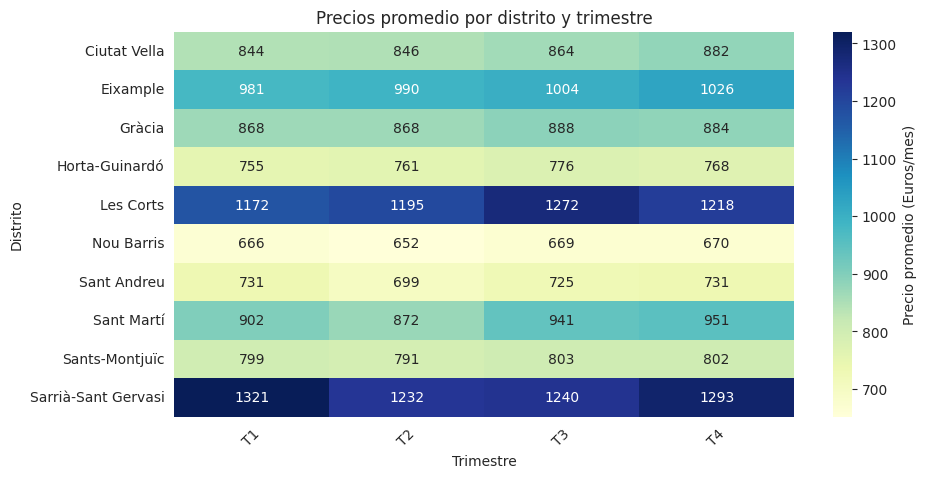

In [133]:
#creamos el mapa de calor
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data5, annot=True, fmt='.0f', cmap='YlGnBu')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Distrito')
ax.set_title('Precios promedio por distrito y trimestre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#guardamos el grafico

plt.savefig('mapa_calor_precios_promedio.png', bbox_inches='tight')
#hacemos un etiquetado a la barras de colores
colorbar = ax.collections[0].colorbar

#le añaadimos el nombre de la unidad de medida
colorbar.set_label('Precio promedio (Euros/mes)')

plt.show()

**Descripción**: La imagen muestra un mapa de calor el cual representa una matriz codificada por colores para ver fácilmente cómo varían los precios promedio por distrito y trimestre. Los colores más oscuros representarían precios más altos, lo que facilita visualmente detectar tendencias o anomalías.